In [1]:
#install geopython libraries
!apt install gdal-bin python-gdal python3-gdal
#install python3-rtree - Geopandas requirement
!apt install python3-rtree
#install geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#install descartes - Geopandas requirement
!pip install descartes

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt

In [6]:
#Read the world data and show the header
world = gpd.read_file('/content/sample_data/ne_110m_admin_0_countries.shp')
world.head()

DataSourceError: Unable to open /content/sample_data/ne_110m_admin_0_countries.shx or /content/sample_data/ne_110m_admin_0_countries.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [9]:
import requests
import zipfile
import io

In [10]:
url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_county_500k.zip'
local_path = 'tmp/'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)]
print(filenames)

Done
['cb_2015_us_county_500k.dbf', 'cb_2015_us_county_500k.prj', 'cb_2015_us_county_500k.shp', 'cb_2015_us_county_500k.shx']


In [11]:
dbf, prj, shp, shx = [filename for filename in filenames]
usa = gpd.read_file(local_path + shp)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
usa.tail() #last 5 records in dataframe

Shape of the dataframe: (3233, 10)
Projection of dataframe: EPSG:4269


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3228,45,019,01252740,0500000US45019,45019,Charleston,06,2372842394,1144346152,"MULTIPOLYGON (((-79.50795 33.02008, -79.50713 ..."
3229,45,077,01248015,0500000US45077,45077,Pickens,06,1285536060,40612589,"MULTIPOLYGON (((-82.86687 34.61742, -82.86451 ..."
3230,46,123,01265784,0500000US46123,46123,Tripp,06,4176233698,13272785,"POLYGON ((-100.23091 43.49989, -100.23044 43.5..."
3231,47,073,01639752,0500000US47073,47073,Hawkins,06,1261443215,32545400,"POLYGON ((-83.2889 36.37879, -83.2825 36.38239..."
3232,48,011,01383791,0500000US48011,48011,Armstrong,06,2354581764,12219587,"POLYGON ((-101.6294 34.75006, -101.62806 34.83..."


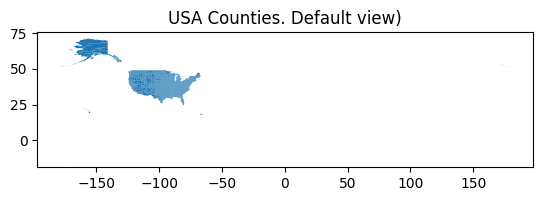

In [12]:
ax = usa.plot()
ax.set_title("USA Counties. Default view)");

In [13]:
fl = usa[usa.STATEFP=='12']

In [20]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.4 MB/s eta 0:00:00


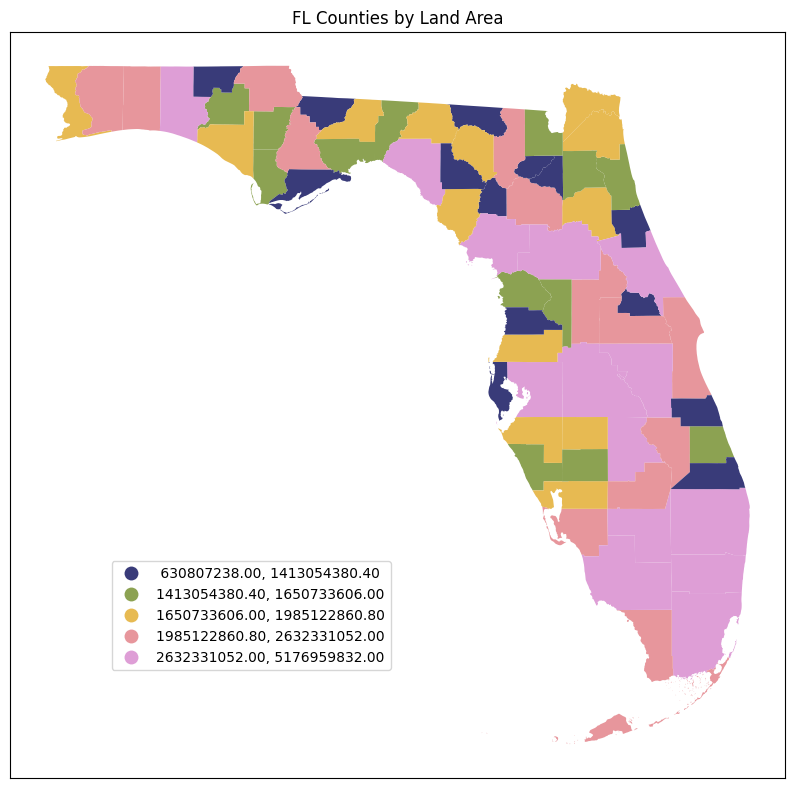

In [21]:
%matplotlib inline
ax = fl.plot(figsize=(10,10), column='ALAND', cmap="tab20b", scheme='quantiles', legend=True)
ax.set(xticks=[], yticks=[]) #removes axes
ax.set_title("FL Counties by Land Area", fontsize='large')
#add the legend and specify its location
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5,0.3))